#### 데이터 출처: https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B040M5&conn_path=I3
#### 2022년 10월  행정구역(읍면동)별/5세별 주민등록인구

In [32]:
import pandas as pd

df = pd.read_excel("C:/Users/user/Desktop/평창군데이터/평창군데이터_전처리/주민등록인구수.xlsx")
df.head()

,시도,시군구,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,...,65 - 69세,70 - 74세,75 - 79세,80세 이상,80 - 84세,85세 이상,85 - 89세,90 - 94세,95 - 99세,100세 이상
0,서울특별시,종로구,2616.0,4066.5,4805.0,5362.5,9698.5,12681.0,10329.0,8862.0,...,8616.0,6068.0,5186.0,7076.5,4131.5,2945.0,2034.5,704.0,180.5,26.0
1,서울특별시,중구,2858.0,3261.0,2970.5,3365.5,7107.5,10746.0,10467.0,9207.0,...,7907.5,5550.5,4475.5,5847.5,3368.5,2479.0,1680.0,637.5,139.5,22.0
2,서울특별시,용산구,5647.0,6626.0,6748.5,7556.5,12809.0,19209.0,19985.0,17428.5,...,12230.5,8397.5,6794.0,9674.5,5483.5,4191.0,2896.5,1040.0,217.5,37.0
3,서울특별시,성동구,8906.5,9809.5,8803.5,9819.0,18107.0,24518.0,23177.0,22772.5,...,15954.0,11017.5,8827.0,10450.0,6300.5,4149.5,2983.5,941.0,187.5,37.5
4,서울특별시,광진구,7048.5,10032.0,11675.5,12883.5,24394.0,36339.0,29944.5,24433.0,...,18808.5,12626.5,9515.0,11107.5,6751.5,4356.0,3077.0,1009.0,230.5,39.5


In [33]:
df.shape

(230, 25)

In [34]:
df.columns

Index(['시도', '시군구', '0 - 4세', '5 - 9세', '10 - 14세', '15 - 19세', '20 - 24세',
       '25 - 29세', '30 - 34세', '35 - 39세', '40 - 44세', '45 - 49세', '50 - 54세',
       '55 - 59세', '60 - 64세', '65 - 69세', '70 - 74세', '75 - 79세', '80세 이상',
       '80 - 84세', '85세 이상', '85 - 89세', '90 - 94세', '95 - 99세', '100세 이상'],
      dtype='object')

In [35]:
young_df = df.iloc[:,2:5].sum(axis=1)
old_df = df.iloc[:,-10:].sum(axis=1)

In [36]:
#노령화지수 = 고령인구(65세 이상) ÷ 유소년인구(~14세)×100

df['노령화지수'] = old_df / young_df * 100

In [37]:
df['유소년인구'] = young_df
df['노년인구'] = old_df

In [38]:
df.drop(df.columns[2:-3], axis=1, inplace=True)

In [39]:
df = df.sort_values(by='노령화지수',ascending=False)
df = df.reset_index(drop=True)

In [40]:
df

,시도,시군구,노령화지수,유소년인구,노년인구
0,경상북도,군위군,1386.372361,1042.0,14446.0
1,경상북도,의성군,1172.763205,2783.0,32638.0
2,경상남도,합천군,1079.009861,2484.5,26808.0
3,경상북도,청도군,1027.290036,2363.5,24280.0
4,전라남도,고흥군,1015.754373,3973.5,40361.0
...,...,...,...,...,...
225,광주광역시,광산구,88.923139,61475.0,54665.5
226,부산광역시,강서구,83.804014,27655.0,23176.0
227,경기도,화성시,71.832991,156626.5,112509.5
228,울산광역시,북구,71.706507,36416.5,26113.0


In [51]:
# 시군구의 광역시, 특별시가 아닌 지역의 구가 들어갔는지 확인 및 제거 

no_df = df[~df['시도'].str.contains('광역시')]  #물결 표시는 부정의 역할
no_df = no_df[~no_df['시도'].str.contains('특별')]
no_df

,시도,시군구,노령화지수,유소년인구,노년인구
0,경상북도,군위군,1386.372361,1042.0,14446.0
1,경상북도,의성군,1172.763205,2783.0,32638.0
2,경상남도,합천군,1079.009861,2484.5,26808.0
3,경상북도,청도군,1027.290036,2363.5,24280.0
4,전라남도,고흥군,1015.754373,3973.5,40361.0
...,...,...,...,...,...
219,경상남도,거제시,102.805176,38019.0,39085.5
220,경상북도,구미시,97.229672,59848.5,58190.5
223,경기도,시흥시,95.045175,72606.0,69008.5
224,경기도,오산시,92.461266,34110.5,31539.0


In [52]:
indexes = no_df[no_df['시군구'].str.endswith('구')]
indexes

,시도,시군구,노령화지수,유소년인구,노년인구
201,경기도,단원구,144.058102,32081.5,46216.0


In [53]:
df.drop(index=201, inplace=True)
df

,시도,시군구,노령화지수,유소년인구,노년인구
0,경상북도,군위군,1386.372361,1042.0,14446.0
1,경상북도,의성군,1172.763205,2783.0,32638.0
2,경상남도,합천군,1079.009861,2484.5,26808.0
3,경상북도,청도군,1027.290036,2363.5,24280.0
4,전라남도,고흥군,1015.754373,3973.5,40361.0
...,...,...,...,...,...
225,광주광역시,광산구,88.923139,61475.0,54665.5
226,부산광역시,강서구,83.804014,27655.0,23176.0
227,경기도,화성시,71.832991,156626.5,112509.5
228,울산광역시,북구,71.706507,36416.5,26113.0


#### 고령화지수 생성 후, 크기별로 내림차순 정렬

In [55]:
df[df['시군구'] == '평창군']

,시도,시군구,노령화지수,유소년인구,노년인구
50,강원도,평창군,589.521368,2925.0,17243.5


In [56]:
round(df.describe())

,노령화지수,유소년인구,노년인구
count,229.0,229.0,229.0
mean,379.0,26211.0,52855.0
std,258.0,29312.0,39408.0
min,71.0,574.0,3252.0
25%,180.0,4485.0,23886.0
50%,283.0,15204.0,42088.0
75%,536.0,36130.0,73087.0
max,1386.0,156626.0,217703.0


#### 노령화지수 로그변환

In [60]:
import numpy as np
df['노령화지수(로그변환)'] = np.log1p(df['노령화지수'])
df.head()

,시도,시군구,노령화지수,유소년인구,노년인구,노령화지수(로그변환)
0,경상북도,군위군,1386.372361,1042.0,14446.0,7.235167
1,경상북도,의성군,1172.763205,2783.0,32638.0,7.067970
2,경상남도,합천군,1079.009861,2484.5,26808.0,6.984725
3,경상북도,청도군,1027.290036,2363.5,24280.0,6.935653
4,전라남도,고흥군,1015.754373,3973.5,40361.0,6.924371


In [61]:
# 파일 저장
df.to_csv('노령화지수.csv',encoding='euc-kr')

#### 평창군은 41위

### 시각화

In [22]:
#한글 깨짐 방지 코드
from matplotlib import rc, style, font_manager
font_name = font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


<AxesSubplot:>

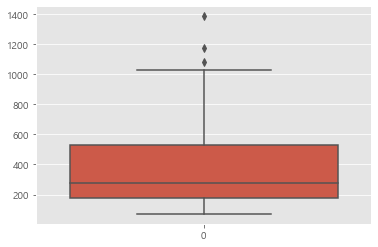

In [23]:
sns.boxplot(data=df['노령화지수'])

In [26]:
y = df.iloc[:, 2].values.copy()
x = df.iloc[:, 1].values.copy()

In [29]:
x[50]

'평창군'

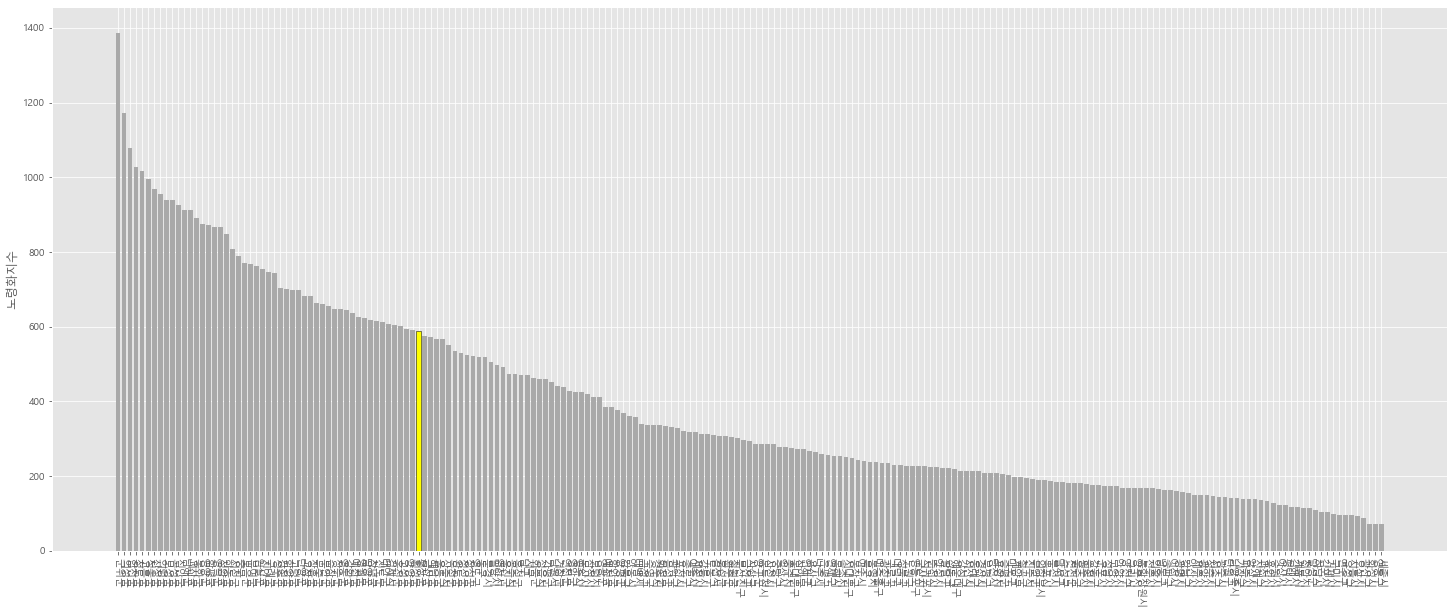

In [31]:
fig, ax = plt.subplots(figsize=(25,10))
ax.bar(x,y,fc='darkgray')
plt.xticks(rotation=-90)
plt.ylabel('노령화지수')

bars = ax.patches
bars[50].set_facecolor("yellow")
bars[50].set_edgecolor("k")

#### 상위 50개 지역만 추출

In [232]:
df_top50 = df.iloc[:50,:]
y = df_top50.iloc[:, 1].values.copy()
x = df_top50.iloc[:, 0].values.copy()

In [236]:
ax.bar(x,y,fc='darkgray')

<BarContainer object of 50 artists>

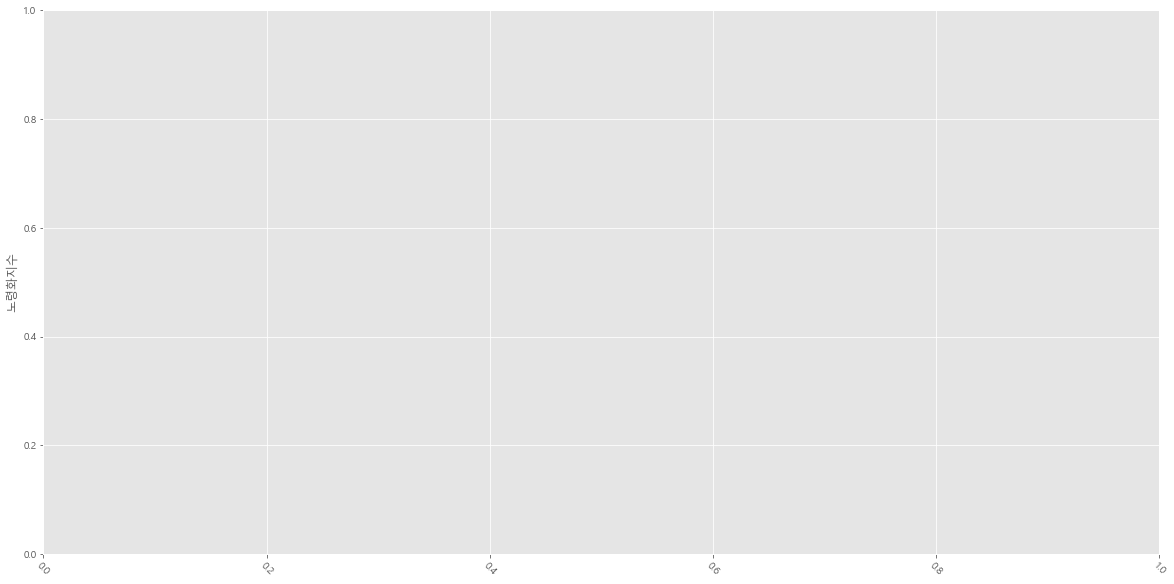

In [237]:
plt.figure(figsize=(20,10))
ax.bar(x,y,fc='darkgray')
plt.xticks(rotation=-45)
plt.ylabel('노령화지수')

bars = ax.patches
bars[1].set_facecolor("yellow")
bars[1].set_edgecolor("k")

In [ ]:
#### 평창이 속한 곳만 포인트